In [1]:
import astropy
from astropy.table import Table,Column
import numpy as np
import matplotlib.pyplot as plt
import glob
import subprocess
import os

from herschelhelp_internal.utils import flux_to_mag,mag_to_flux

In [2]:
def pop_list(ls,indices):
    for n,ind in enumerate(indices):
        ls.pop(ind)
    return(ls)

In [3]:
photz = Table.read('data/photz/Bootes_opt_spitzer_merged_vac_opt3as_irac4as_all_hpx_public.fits')
#photz = Table.read('/beegfs/lofar/deepfields/science_ready_catalogs/Bootes_opt_spitzer_merged_vac_opt3as_irac4as_all_hpx_public.fits')

In [4]:
photz[10:15]

ID,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,Bw_flux,Bw_fluxerr,R_flux,R_fluxerr,I_flux,I_fluxerr,z_flux,z_fluxerr,z_Subaru_flux,z_Subaru_fluxerr,y_flux,y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,Ks_flux,Ks_fluxerr,ch1_flux,ch1_fluxerr,ch2_flux,ch2_fluxerr,ch3_flux,ch3_fluxerr,ch4_flux,ch4_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32
10,11,--,216.6147511,32.2828152,N/A,nan,nan,0.011384632,nan,--,--,nan,nan,nan,N/A,0.86,0,0,1,-99.0,-99.0,-99.0,-99.0,0.5491637098169164,0.0930712660674784,-99.0,-99.0,-99.0,-99.0,93.58324238975183,0.21231785340565068,-99.0,-99.0,-99.0,-99.0,100.1450059972558,1.028503969900072,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,68.51979657252741,1.4808519497279349,46.52377190850666,1.7509647980211298,51.132477145223675,5.386914918261823,22.49490278461326,6.439031382746634,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,True,0,0.0,0.0,--,0.0,-99.0,-99.0,4.6221,4.26,4.96,0.552,4.0365,3.89,4.19,0.233,7,7,5,1.7819500000000001,-99.0,,9355035,1
11,12,--,216.5657206,32.2828291,HELP_J142838.770+321819.187,217.16154025616197,32.305329627634,0.011453456,nan,--,--,nan,nan,nan,N/A,0.73,0,0,1,-99.0,-99.0,-99.0,-99.0,0.29005126876572973,0.08377370010909324,-99.0,-99.0,-99.0,-99.0,1.9318125590726964,0.1939335958306483,-99.0,-

In [64]:
for colname in photz.colnames:
    if ('flux' in colname) and ('err' not in colname):
        snr = photz[colname]/photz[colname+'err']
        mask = photz[colname]==-99
        snr[mask] = -99
        snr_col = Column(snr,name=colname+'_snr')
        photz.add_column(snr_col)

In [65]:
photz[:5]

ID,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,Bw_flux,Bw_fluxerr,R_flux,R_fluxerr,I_flux,I_fluxerr,z_flux,z_fluxerr,z_Subaru_flux,z_Subaru_fluxerr,y_flux,y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,Ks_flux,Ks_fluxerr,ch1_flux,ch1_fluxerr,ch2_flux,ch2_fluxerr,ch3_flux,ch3_fluxerr,ch4_flux,ch4_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,FUV_flux_snr,NUV_flux_snr,u_flux_snr,Bw_flux_snr,R_flux_snr,I_flux_snr,z_flux_snr,z_Subaru_flux_snr,y_flux_snr,J_flux_snr,H_flux_snr,K_flux_snr,Ks_flux_snr,ch1_flux_snr,ch2_flux_snr,ch3_flux_snr,ch4_flux_snr
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1,--,216.473863,32.2825963,N/A,nan,nan,0.01093379,nan,--,--,nan,nan,nan,N/A,0.64,0,0,1,-99.0,-99.0,-99.0,-99.0,0.10352171485738193,0.09050546420954841,-99.0,-99.0,-99.0,-99.0,1.2489124884509977,0.17990861652974743,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-0.49297147310738154,0.9599805695282839,0.20943547943156204,1.134281811727078,7.514107605812171,4.5540334671514415,7.615719616676927,4.989334194948697,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,True,0,0

In [98]:
for colname in photz.colnames:
    if 'snr' in colname:
        mask = photz[colname]>1
        print('number of sources in band: {} with SNR>1 is: {}'.format(colname.replace('_snr',''),np.sum(mask)))

number of sources in band: FUV_flux with SNR>1 is: 6770
number of sources in band: NUV_flux with SNR>1 is: 826586
number of sources in band: u_flux with SNR>1 is: 1497863
number of sources in band: Bw_flux with SNR>1 is: 1721119
number of sources in band: R_flux with SNR>1 is: 1770219
number of sources in band: I_flux with SNR>1 is: 1926848
number of sources in band: z_flux with SNR>1 is: 985215
number of sources in band: z_Subaru_flux with SNR>1 is: 1497810
number of sources in band: y_flux with SNR>1 is: 1267038
number of sources in band: J_flux with SNR>1 is: 1360091
number of sources in band: H_flux with SNR>1 is: 1218771
number of sources in band: K_flux with SNR>1 is: 352501
number of sources in band: Ks_flux with SNR>1 is: 1025524
number of sources in band: ch1_flux with SNR>1 is: 1443087
number of sources in band: ch2_flux with SNR>1 is: 1328883
number of sources in band: ch3_flux with SNR>1 is: 902095
number of sources in band: ch4_flux with SNR>1 is: 923620
number of sources 

In [94]:
snr_cols[13:]

['ch1_flux_snr', 'ch2_flux_snr', 'ch3_flux_snr', 'ch4_flux_snr']

In [115]:
photz.remove_columns(['optical_snr','NIR_snr','IRAC_snr'])

snr_cols = []
for colname in photz.colnames:
    if 'snr' in colname:
        snr_cols.append(colname)

snr = np.zeros(len(photz))
for colname in snr_cols[2:9]:
    if ('flux' in colname) and ('err' not in colname):
        new_snr = photz[colname]
        mask = new_snr < 0
        new_snr[mask]=0
        snr = snr + new_snr**2
snr_col = Column(np.sqrt(snr),name='optical_snr')
photz.add_column(snr_col)

snr = np.zeros(len(photz))
for colname in snr_cols[9:13]:
    if ('flux' in colname) and ('err' not in colname):
        new_snr = photz[colname]
        mask = new_snr < 0
        new_snr[mask]=0
        snr = snr + new_snr**2
snr_col = Column(np.sqrt(snr),name='NIR_snr')
photz.add_column(snr_col)

snr = np.zeros(len(photz))
for colname in snr_cols[13:]:
    if ('flux' in colname) and ('err' not in colname):
        new_snr = photz[colname]
        mask = new_snr < 0
        new_snr[mask]=0
        snr = snr + new_snr**2
snr_col = Column(np.sqrt(snr),name='IRAC_snr')
photz.add_column(snr_col,)

In [116]:
photz

ID,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,Bw_flux,Bw_fluxerr,R_flux,R_fluxerr,I_flux,I_fluxerr,z_flux,z_fluxerr,z_Subaru_flux,z_Subaru_fluxerr,y_flux,y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,Ks_flux,Ks_fluxerr,ch1_flux,ch1_fluxerr,ch2_flux,ch2_fluxerr,ch3_flux,ch3_fluxerr,ch4_flux,ch4_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,FUV_flux_snr,NUV_flux_snr,u_flux_snr,Bw_flux_snr,R_flux_snr,I_flux_snr,z_flux_snr,z_Subaru_flux_snr,y_flux_snr,J_flux_snr,H_flux_snr,K_flux_snr,Ks_flux_snr,ch1_flux_snr,ch2_flux_snr,ch3_flux_snr,ch4_flux_snr,optical_snr,NIR_snr,IRAC_snr
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1,--,216.473863,32.2825963,N/A,nan,nan,0.01093379,nan,--,--,nan,nan,nan,N/A,0.64,0,0,1,-99.0,-99.0,-99.0,-99.0,0.10352171485738193,0.09050546420954841,-99.0,-99.0,-99.0,-99.0,1.2489124884509977,0.17990861652974743,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-0.49297147310738154,0.9599805695282839,0.20943547943156204,1.134281811727078,7.514107605812171,4.5540334671514415,7.615719616676927,4.989334194948697,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [85]:
table = []
snr_cols = []
len_cols = []
snr_table = open('snr_table.txt','w')
snr_table.write('xxxxxxxxxx | ')
for colname in photz.colnames:
    if 'snr' in colname:
        snr_cols.append(colname)
        writing = colname
        while len(writing)<25:
            writing = ' ' + writing + ' '
        if len(writing)==25:
            writing = writing[:-1] + '|'
        if len(writing)>25:
            writing = writing[1:-1] + '|'
        len_cols.append(writing)
        snr_table.write(writing)
snr_table.write('\n')

snr_table.write('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n')


table.append(snr_cols)
for n,colname in enumerate(snr_cols):
    print(colname)
    row = []
    row.append(colname)
    snr_table.write(len_cols[n])
    for n,col in enumerate(snr_cols):
        mask = (photz[colname]>1) & (photz[col]>1)
        row.append(np.sum(mask))
        writing = str(np.sum(mask))
        while len(writing)<len(len_cols[n]):
            writing = ' ' + writing + ' '
        if len(writing)==len(len_cols[n]):
            writing = writing[:-1] + '|'
        if len(writing)>len(len_cols[n]):
            writing = writing[1:-1] + '|'
        snr_table.write(writing)
    snr_table.write('\n')
    snr_table.write('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n')
    table.append(row)
snr_table.close()

FUV_flux_snr
NUV_flux_snr
u_flux_snr
Bw_flux_snr
R_flux_snr
I_flux_snr
z_flux_snr
z_Subaru_flux_snr
y_flux_snr
J_flux_snr
H_flux_snr
K_flux_snr
Ks_flux_snr
ch1_flux_snr
ch2_flux_snr
ch3_flux_snr
ch4_flux_snr


In [81]:
colname[1:-1]

'h4_flux_sn'

/its/home/im281/.conda/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


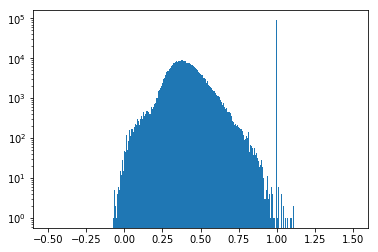

In [60]:
bins = np.arange(-0.5,1.5,0.001)
y = np.log10(photz['Ks_fluxerr'])
plt.hist(y,bins=bins,log=True)
plt.show()

/its/home/im281/.conda/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


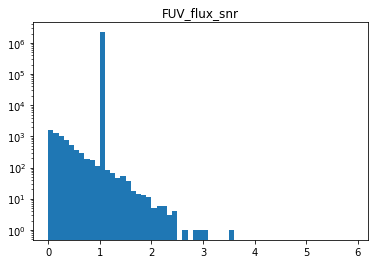

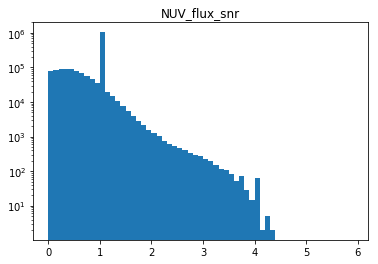

/its/home/im281/.conda/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


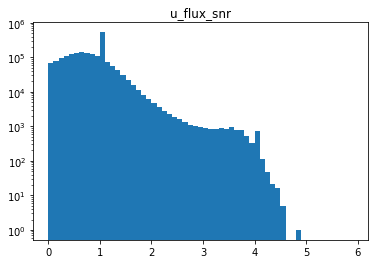

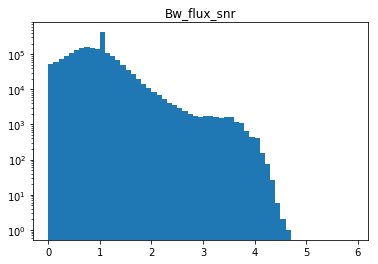

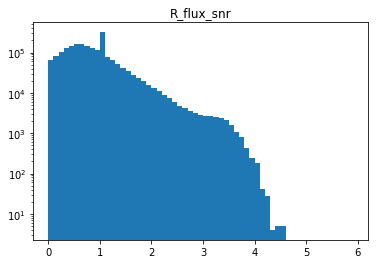

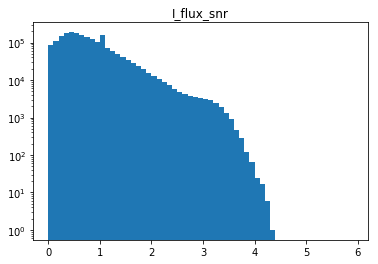

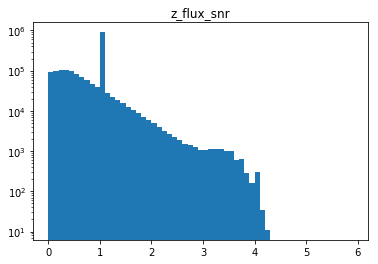

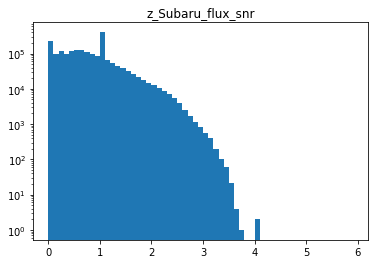

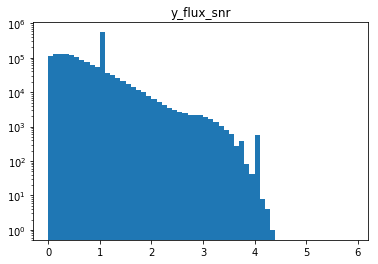

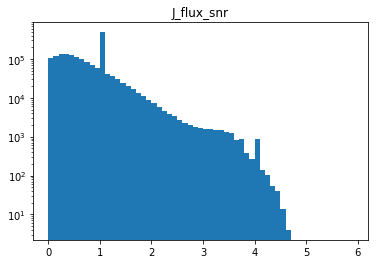

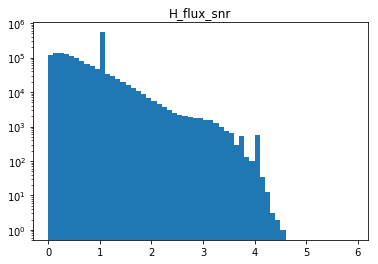

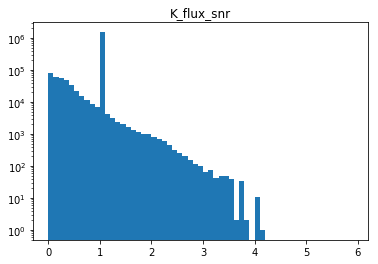

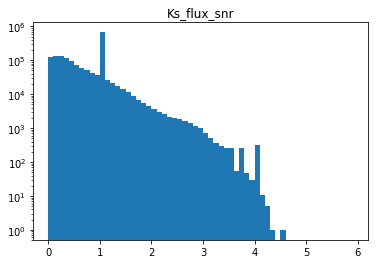

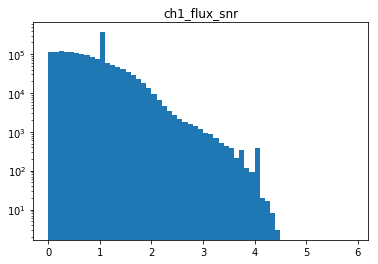

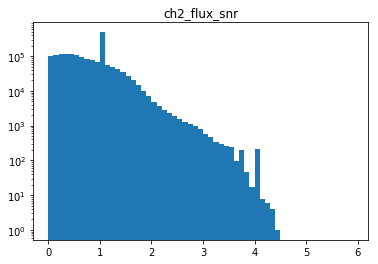

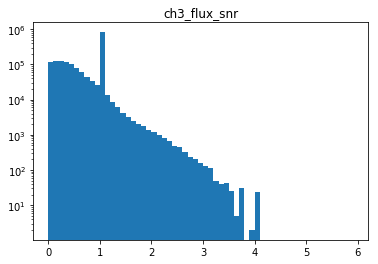

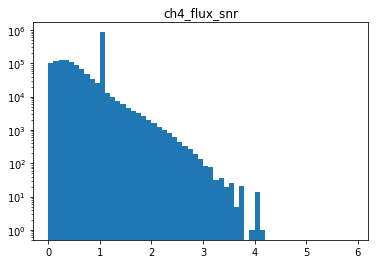

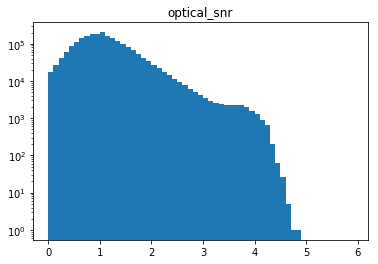

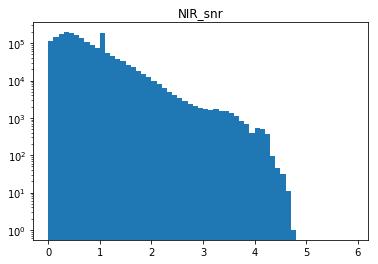

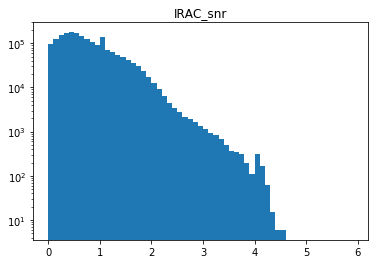

In [139]:
for col in photz.colnames:
    if 'snr' not in col:
        continue
        
    bins = np.arange(0,6,0.1)
    y = np.log10(photz[col])
    plt.hist(y,bins=bins,log=True)
    plt.title(col)
    plt.show()

In [141]:
mask = photz['optical_snr']>40000
photz[mask]

ID,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,Bw_flux,Bw_fluxerr,R_flux,R_fluxerr,I_flux,I_fluxerr,z_flux,z_fluxerr,z_Subaru_flux,z_Subaru_fluxerr,y_flux,y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,Ks_flux,Ks_fluxerr,ch1_flux,ch1_fluxerr,ch2_flux,ch2_fluxerr,ch3_flux,ch3_fluxerr,ch4_flux,ch4_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,FUV_flux_snr,NUV_flux_snr,u_flux_snr,Bw_flux_snr,R_flux_snr,I_flux_snr,z_flux_snr,z_Subaru_flux_snr,y_flux_snr,J_flux_snr,H_flux_snr,K_flux_snr,Ks_flux_snr,ch1_flux_snr,ch2_flux_snr,ch3_flux_snr,ch4_flux_snr,optical_snr,NIR_snr,IRAC_snr
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
795030,795031,--,217.3191578,33.8609682,HELP_J143320.301+335611.479,218.33458855616198,33.936522027634,0.011053081,nan,--,--,nan,nan,nan,N/A,0.03,0,1,1,-99.0,-99.0,44.23480987548828,0.04761639982461929,1399.0147816430544,0.039157807319054605,986.4001381809794,0.07146533016356038,1377.276487148105,0.10843556116446518,-90.0,-90.0,-90.0,-90.0,-90.0,-90.0,2381.395582580706,0.5098649634431354,6378.584998268634,1.0310227559165241,5031.082919415203,1.6158858654310393,3525.1097835014807,9.075063242554165,3849.7733680011006,2.7408266069874685,1548.9291465486167,1.495203858213543,985.2273788747843,1.27541156243682

In [5]:
cigale_input = photz.copy()

In [6]:
filters_file = open('data/photz/filters/filter.bootes_mbrown_2014a.res.info','r')
filters = []
for line in filters_file:
    temp = line.split(' ')
    filters.append(temp)
filters_file.close()

for n,line in enumerate(filters):
    if n!=32:
        filters[n] = line[0:-1]
    else:
        filters[n][-1] = filters[n][-1].replace('\n','')
    filters[n] = pop_list(filters[n],[1 for m in range(len(filters[n])-2)])
    filters[n][-1] = filters[n][-1].replace('.filter','')

In [7]:
translate_file = open('data/photz/filters/brown.zphot.2014.translate','r')
translate = []
for line in translate_file:
    if '#' in line:
        continue
    temp = line.split(' ')
    translate.append(temp)
translate_file.close()

translate = translate[:len(translate)-1]

for n,line in enumerate(translate):
    translate[n][1] = line[1][1:-1]

In [9]:
translate

[['u_flux', '9'],
 ['u_fluxerr', '9'],
 ['Bw_flux', '2'],
 ['Bw_fluxerr', '2'],
 ['R_flux', '11'],
 ['R_fluxerr', '11'],
 ['I_flux', '7'],
 ['I_fluxerr', '7'],
 ['z_flux', '34'],
 ['z_fluxerr', '34'],
 ['z_Subaru_flux', '33'],
 ['z_Subaru_fluxerr', '33'],
 ['y_flux', '10'],
 ['y_fluxerr', '10'],
 ['J_flux', '19'],
 ['J_fluxerr', '19'],
 ['H_flux', '18'],
 ['H_fluxerr', '18'],
 ['K_flux', '8'],
 ['K_fluxerr', '8'],
 ['Ks_flux', '20'],
 ['Ks_fluxerr', '20'],
 ['ch1_flux', '3'],
 ['ch1_fluxerr', '3'],
 ['ch2_flux', '4'],
 ['ch2_fluxerr', '4'],
 ['ch3_flux', '5'],
 ['ch3_fluxerr', '5'],
 ['ch4_flux', '6'],
 ['ch4_fluxerr', '6']]

In [8]:
for n,line in enumerate(translate):
    colname = line[0]
    filt_num = int(line[1])
    filt_name = ''
    for m,filt in enumerate(filters):
        if m+1==filt_num:
            print(filt)
            filt_name = filt[1]
    
    if 'err' in colname:
        filt_name = filt_name+'_err'
    #print(colname)
    #print(filt_name)
    cigale_input.rename_column(colname,filt_name)
    cigale_input[filt_name] = cigale_input[filt_name]/1000

['9', 'LBCBlue_Uspec']
['9', 'LBCBlue_Uspec']
['2', 'Bw_atmccd']
['2', 'Bw_atmccd']
['11', 'R_atmccd']
['11', 'R_atmccd']
['7', 'I_atmccd']
['7', 'I_atmccd']
['34', 'sdssz2']
['34', 'sdssz2']
['33', 'suprime_FDCCD_z']
['33', 'suprime_FDCCD_z']
['10', 'LBCR_Y']
['10', 'LBCR_Y']
['19', 'jband']
['19', 'jband']
['18', 'hband']
['18', 'hband']
['8', 'K_atmccd']
['8', 'K_atmccd']
['20', 'kband']
['20', 'kband']
['3', 'IRAC_ch1_total_response']
['3', 'IRAC_ch1_total_response']
['4', 'IRAC_ch2_total_response']
['4', 'IRAC_ch2_total_response']
['5', 'IRAC_ch3_total_response']
['5', 'IRAC_ch3_total_response']
['6', 'IRAC_ch4_total_response']
['6', 'IRAC_ch4_total_response']


In [121]:
cigale_input.rename_column('z1_median','redshift')
cigale_input.rename_column('ID','id')

In [131]:
cols = ['id',
 'RA',
 'DEC',
 'FUV_flux',
 'FUV_fluxerr',
 'NUV_flux',
 'NUV_fluxerr',
 'LBCBlue_Uspec',
 'LBCBlue_Uspec_err',
 'Bw_atmccd',
 'Bw_atmccd_err',
 'R_atmccd',
 'R_atmccd_err',
 'I_atmccd',
 'I_atmccd_err',
 'sdssz2',
 'sdssz2_err',
 'suprime_FDCCD_z',
 'suprime_FDCCD_z_err',
 'LBCR_Y',
 'LBCR_Y_err',
 'jband',
 'jband_err',
 'hband',
 'hband_err',
 'K_atmccd',
 'K_atmccd_err',
 'kband',
 'kband_err',
 'IRAC_ch1_total_response',
 'IRAC_ch1_total_response_err',
 'IRAC_ch2_total_response',
 'IRAC_ch2_total_response_err',
 'IRAC_ch3_total_response',
 'IRAC_ch3_total_response_err',
 'IRAC_ch4_total_response',
 'IRAC_ch4_total_response_err',
 'redshift',
 'FUV_flux_snr',
 'NUV_flux_snr',
 'u_flux_snr',
 'Bw_flux_snr',
 'R_flux_snr',
 'I_flux_snr',
 'z_flux_snr',
 'z_Subaru_flux_snr',
 'y_flux_snr',
 'J_flux_snr',
 'H_flux_snr',
 'K_flux_snr',
 'Ks_flux_snr',
 'ch1_flux_snr',
 'ch2_flux_snr',
 'ch3_flux_snr',
 'ch4_flux_snr',
 'optical_snr',
 'NIR_snr',
 'IRAC_snr']

In [132]:
Table.write(cigale_input[cols],'data/cigale_input_Bootes_full.fits',format='fits',overwrite=True)

In [133]:
mask = (cigale_input['redshift']>0.5) & (cigale_input['redshift']<1.0)
mini_input = cigale_input[mask][::350]

In [134]:
Table.write(mini_input[cols],'data/cigale_input_Bootes_subset.fits',format='fits',overwrite=True)

In [135]:
test = Table.read('data/cigale_input_Bootes_subset.fits')

In [136]:
test

id,RA,DEC,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,LBCBlue_Uspec,LBCBlue_Uspec_err,Bw_atmccd,Bw_atmccd_err,R_atmccd,R_atmccd_err,I_atmccd,I_atmccd_err,sdssz2,sdssz2_err,suprime_FDCCD_z,suprime_FDCCD_z_err,LBCR_Y,LBCR_Y_err,jband,jband_err,hband,hband_err,K_atmccd,K_atmccd_err,kband,kband_err,IRAC_ch1_total_response,IRAC_ch1_total_response_err,IRAC_ch2_total_response,IRAC_ch2_total_response_err,IRAC_ch3_total_response,IRAC_ch3_total_response_err,IRAC_ch4_total_response,IRAC_ch4_total_response_err,redshift,FUV_flux_snr,NUV_flux_snr,u_flux_snr,Bw_flux_snr,R_flux_snr,I_flux_snr,z_flux_snr,z_Subaru_flux_snr,y_flux_snr,J_flux_snr,H_flux_snr,K_flux_snr,Ks_flux_snr,ch1_flux_snr,ch2_flux_snr,ch3_flux_snr,ch4_flux_snr,optical_snr,NIR_snr,IRAC_snr
,deg,deg,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
13,216.6028796,32.2828544,-99.0,-99.0,-99.0,-99.0,0.00023273620534803997,9.918975610118964e-05,-0.099,-0.099,-0.099,-0.099,0.0011865707493417404,0.000261531643280577,-0.099,-0.099,-0.099,-0.099,0.001064925270960714,0.0008333855894066176,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,9.022716626757443e-05,0.0015902152188892842,-0.009888168681184197,0.0014532940358042766,-0.006836248021916163,0.005859419596031785,0.0002592298460150744,0.005561450798430201,0.7527,-99.0,-99.0,2.346373400803721,0.0,0.0,4.537006438141639,0.0,0.0,1.2778301958868235,0.0,0.0,0.0,0.0,0.05673896539022894,0.0,0.0,0.046611910346891085,5.26523936447889,0.0,0.07343010540466499
3000,218.028875,32.3047653,-99.0,-99.0,-99.0,-99.0,0.00028355327882666616,4.246899676315596e-05,0.00017426779079833565,3.873901424695214e-05,0.0004608525527806577,0.00011590330159304685,0.0008090423043754242,0.00023031917472592767,0.0006048269197001587,0.0013840433251918825,0.0008103702490623732,0.0007121877464678051,0.0006344298306344172,0.0008368793906461178,-0.099,-0.099,-0.0026726753879545697,0.0035697898721906824,-0.099,-0.099,-0.099,-0.099,0.0013078634140731538,0.00084048583250663,0.0020193135180367108,0.0012420325782585167,0.006518727367290126,0.0045461542818893575,0.0013897171767995075,0.004776928989164162,0.851,-99.0,-99.0,6.676712435850691,4.498508652993061,3.976181406796998,3.5127006048808496,0.4369999903119407,1.1378604210498118,0.7580899203941464,0.0,0.0,0.0,0.0,1.5560802615466298,1.6258136488400636,1.4338992834578805,0.2909227204239165,9.748053591774752,0.0,2.6842799752428106
5145,217.6147678,32.3120822,-99.0,-99.0,-99.0,-99.0,0.0003516005363199213,5.487502578418235e-05,0.0002411222806506146,4.3628310831842046e-05,0.0004189114389319002,0.00011009618912521546,0.0008286278465508019,0.00015079902438447235,-0.0020248411812654014,0.0013405963347986472,0.0012437665260624725,0.00043712124462425093,0.00034752323610218026,0.0008611450609421638,-0.099,-0.099,0.00016331021448079853,0.004178917695756809,-0.099,-0.099,-0.099,-0.099,5.677269146388264e-05,0.0009317888615680232,-0.00045822388840467454,0.0010193620769548487,-0.0147030482451637,0.005345622914414434,-0.014312028643141503,0.00414751028021476,0.732,-99.0,-99.0,6.407296056729501,5.526738854960021,3.80495857540955,5.4949151689347735,0.0,2.845358218934459,0.4035594603793711,0.0,0.03907954795248074,0.0,0.0,0.06092870799973399,0.0,0.0,0.0,11.159256751056404,0.03907954795248074,0.06092870799973399
7296,217.893006,32.3184038,-99.0,-99.0,-99.0,-99.0,0.00019541038723749438,3.6176137944140764e-05,0.00018542809194657296

In [128]:
mag_to_flux(20)

(3.6307805477010174e-05, None)

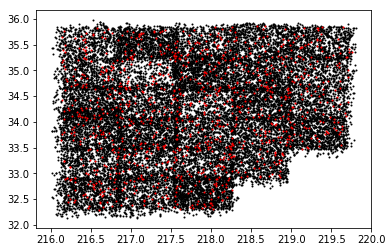

In [129]:
x = cigale_input['RA'][::100]
y = cigale_input['DEC'][::100]
plt.scatter(x,y,s=1,c='black')

x = test['RA']
y = test['DEC']
plt.scatter(x,y,s=1,c='red')
plt.show()

In [37]:
mini_input

id,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,LBCBlue_Uspec,LBCBlue_Uspec_err,Bw_atmccd,Bw_atmccd_err,R_atmccd,R_atmccd_err,I_atmccd,I_atmccd_err,sdssz2,sdssz2_err,suprime_FDCCD_z,suprime_FDCCD_z_err,LBCR_Y,LBCR_Y_err,jband,jband_err,hband,hband_err,K_atmccd,K_atmccd_err,kband,kband_err,IRAC_ch1_total_response,IRAC_ch1_total_response_err,IRAC_ch2_total_response,IRAC_ch2_total_response_err,IRAC_ch3_total_response,IRAC_ch3_total_response_err,IRAC_ch4_total_response,IRAC_ch4_total_response_err,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,redshift,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32
13,14,--,216.6028796,32.2828544,N/A,nan,nan,0.011406411,nan,--,--,nan,nan,nan,N/A,0.8,0,0,1,-99.0,-99.0,-99.0,-99.0,0.00023273620534803997,9.918975610118964e-05,-0.099,-0.099,-0.099,-0.099,0.0011865707493417404,0.000261531643280577,-0.099,-0.099,-0.099,-0.099,0.001064925270960714,0.0008333855894066176,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,9.022716626757443e-05,0.0015902152188892842,-0.009888168681184197,0.0014532940358042766,-0.006836248021916163,0.005859419596031785,0.0002592298460150744,0.005561450798430201,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,True,True,0,0.0,0.0,--,0.0,-99.0,-99.0,0.7527,0.0,1.64,0.358,5.0146,4.36,5.61,0.223,6,6,-99,0.32172900000000004,-99.0,,9355035,1
3909,3910,--,217.7046297,32.3081404,N/A,nan,nan,0.0083